## Lab Exercise Week \#4: Naïve Bayes in Machine Learning

### Objective:
The goal of this lab exercise is to understand Naïve Bayes and its application in machine learning. You will apply a naïve bayes classifier to the spam dataset and use it to make predictions.

### Datasets:
For this lab exercise, you'll use the spam.csv dataset from Brightspace.

### Libraries:
`scikit-learn` provides multiple implementations of Naive Bayes that differ on how conditional probabilities are calculated. So the different implementations are suitable for different types of data. 

- `CategorialNB` will work with categorical data once it is processed using an `OrdinalEncoder`
- `GaussianNB` assumes the numerical features have a Gaussian distribution
- `BernoulliNB` binary data
- `MultinomialNB` count data, e.g. word counts

### Tasks:

#### 1). Data Loading and Libraries:
<ul>
<li>Import all needed libraries.</li>
<li>Load the spam.csv dataset.</li>
<li>Explore the dataset to understand its structure and features.</li>
<li>Select approprate features for a your model.</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

data = pd.read_csv('spam.csv', encoding='latin-1')
data.head(n=10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


#### 2). Data Exploration:
Count how many spam and ham emails it contains and visualise this in a bar chart or pie chart.

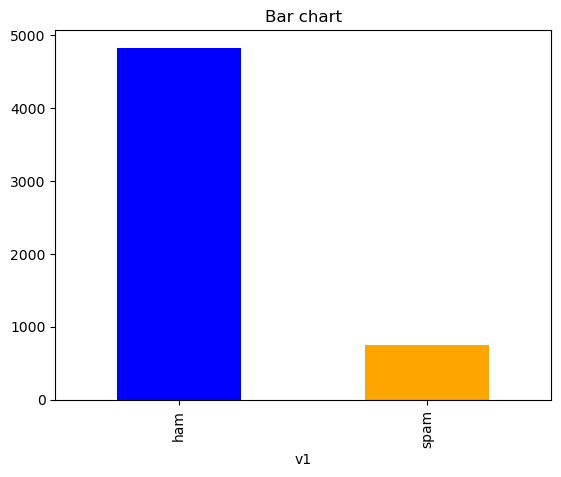

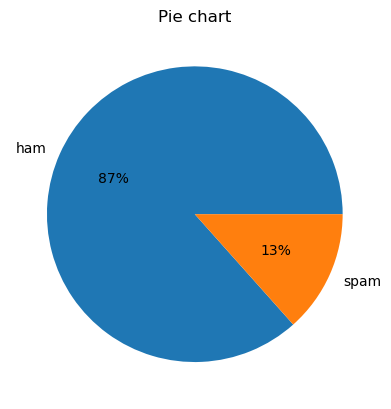

In [2]:
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

#### 3). Text Analytics:
Find the frequencies of words in spam and ham messages. The message text will be our descriptive feature. We can use a Counter object to collect frequencies.

In [5]:
count1 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

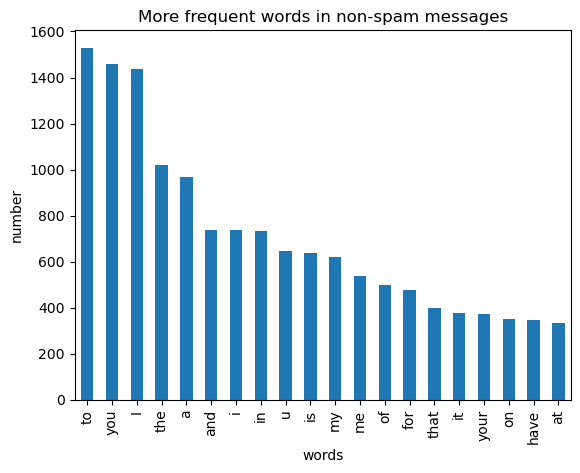

In [6]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

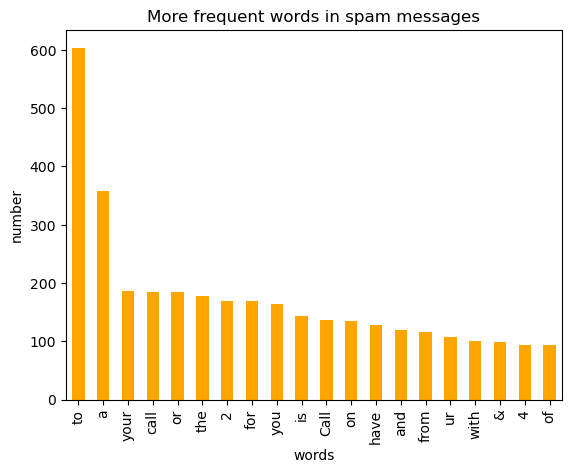

In [7]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

We can see that the majority of frequent words in both cases are stop words such as 'to', 'a', 'or' and so on. These are the most common words in the English language.

#### 4). Feature Engineering:
Extract the features, fit and transform by using `sklearn.feature_extraction` and `fit_and_transform`. Check the shape of your features.

In [8]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"])
np.shape(X)

(5572, 8411)

#### 5). Training and Test Set Preparation:
Use the `train_test_split` function to split the dataset in training and test (1/3). Test the split by printing out the shape of both sets.

In [9]:
data["v1"]=data["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8411), (1839, 8411)]


#### 6). Prediction:
Use the `MultinomialNB` classifier from the `naive_bayes` package to fit and predict the target variable. Find out what the regularisation parameter &alpha; means and try to find the best value for it.

In [10]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

#### 7). Evaluation:
The `MultinomialNB` object you used for your prediction, also has variables for `score` (accuracy), `precision` and `recall`. Use them to create a matrix with your results (ideally for different &alpha; values). How good was your prediction on the test set?

In [11]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.998661,0.974443,0.920635,0.895753
1,0.11001,0.997857,0.976074,0.936508,0.893939
2,0.22001,0.997857,0.977705,0.936508,0.904215
3,0.33001,0.997857,0.977162,0.936508,0.900763
4,0.44001,0.997053,0.977162,0.936508,0.900763
5,0.55001,0.996518,0.976618,0.936508,0.897338
6,0.66001,0.996518,0.976074,0.932540,0.896947
7,0.77001,0.996518,0.976074,0.924603,0.903101
8,0.88001,0.995982,0.976074,0.924603,0.903101
9,0.99001,0.995982,0.976074,0.920635,0.906250


In [14]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             15.510010
Train Accuracy     0.979641
Test Accuracy      0.969549
Test Recall        0.777778
Test Precision     1.000000
Name: 141, dtype: float64

In [15]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1587,0
Actual 1,62,190
